In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from icecream import ic

In [2]:
df = pd.read_csv("data\notion_fl_research_all.csv")

In [3]:
df.columns

Index(['Notes', 'FL FW used', 'ML FW used', 'Paper / Resource',
       'IMO Importance', 'Categories', 'TRGs: Problems/Challenges',
       'Contributions - Details', 'Contributions',
       'Limitations & Future Work - Details', 'Limitations / Future Work',
       'Results'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=28, step=1)

In [5]:
df[["TRGs: Problems/Challenges"]]

,TRGs: Problems/Challenges
0,"low data diversity, node diversity, resource w..."
1,"complexity, customization, ease-of-use, scalab..."
2,"communication overhead, computational overhead..."
3,investigate X
4,"industry vs research gap, investigate X"
5,investigate X
6,"performance, scalability"
7,"investigate X, security/privacy"
8,"communication overhead, performance, resource ..."
9,"performance, resource wastage"


In [6]:
def count_plot(original_key: str, final_key: str) -> None:
    _df = df.copy()
    #_df.dropna(subset=["Contributions"], inplace=True)
    _df.dropna(subset=[original_key], inplace=True)
    #_df.dropna(inplace=True)
    _df = _df[[original_key]]
    tmp_uniques = _df[original_key].unique()
    uniques = set()
    for value in tmp_uniques:
        if not isinstance(value, str):
            continue
        for individual_value in value.split(", "):
            uniques.add(individual_value)

    for u in uniques:
        _df[u] = _df[original_key].apply(lambda x: int(u in x))

    dik = {}
    for u in uniques:
        dik[u] = _df[u].sum()

    # ic("BBBBBBB", uniques, dik)

    test = pd.DataFrame(list(dik.items()), columns=[final_key, "Count"]).sort_values(by="Count", ascending=False)
    sns.barplot(data=test, y=final_key, x="Count")
    plt.show()

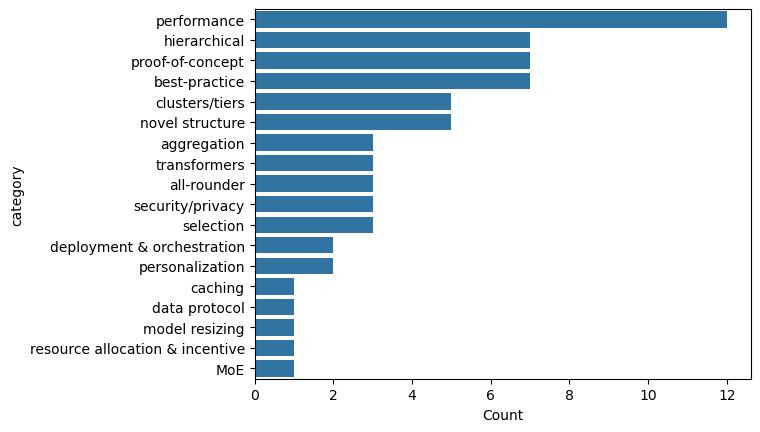

In [7]:
count_plot(original_key="Categories", final_key="category")

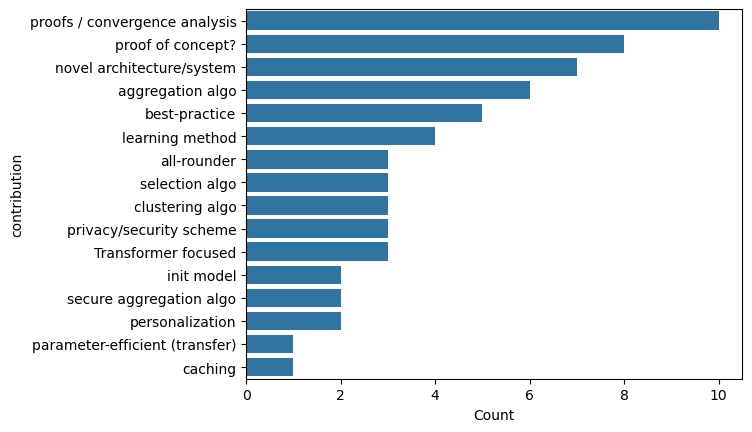

In [8]:
count_plot(original_key="Contributions", final_key="contribution")

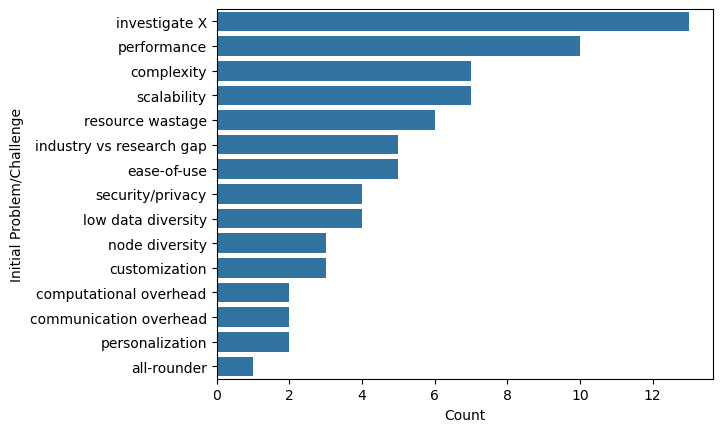

In [9]:
count_plot(original_key="TRGs: Problems/Challenges", final_key="Initial Problem/Challenge")

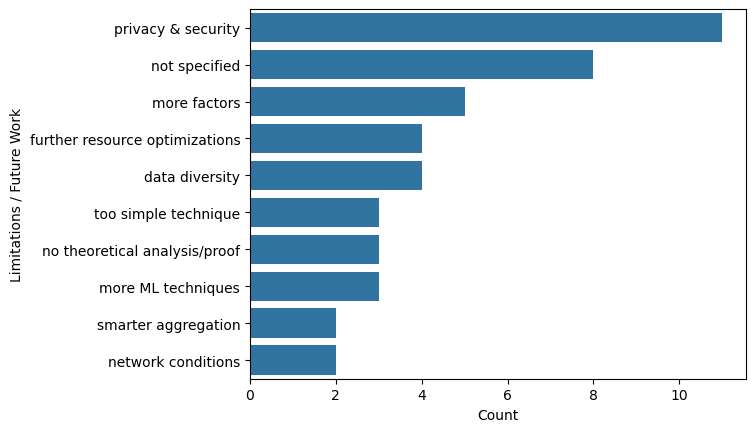

In [10]:
count_plot(original_key="Limitations / Future Work", final_key="Limitations / Future Work")

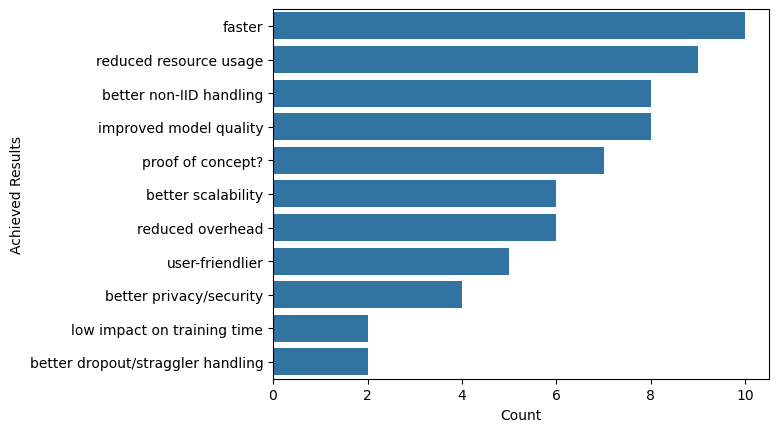

In [11]:
count_plot(original_key="Results", final_key="Achieved Results")

In [ ]:
count_plot(original_key="ML FW used", final_key="ML Framework Used")

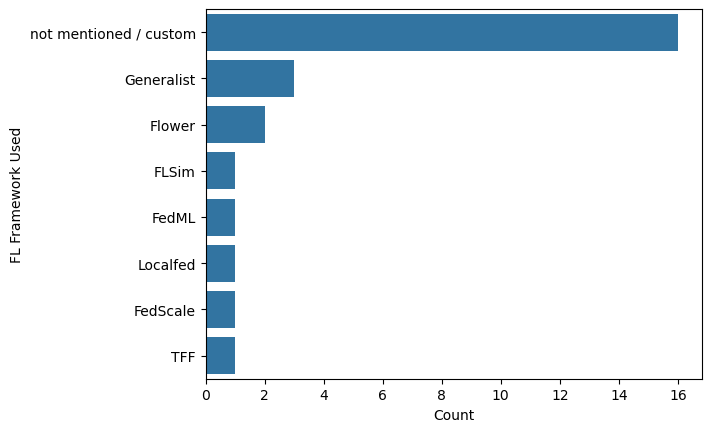

In [12]:
count_plot(original_key="FL FW used", final_key="FL Framework Used")